# Prediction of Economic Factors Using Machine Learning Techniques

## Importing Libraries

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Opening the raw data and reading the first lines

In [116]:
Data = pd.read_excel('db11.xls',engine='xlrd')
Data.head(20)

,Epib,Année,Ppetrrole(Moi tonnes),Production de GNL (en millions de tonnes),Production de GPL (en milliers de tonnes métriques),Production Cacao (en milliers de tonnes),Productions Café (en milliers de tonnes),Production Coton (en milliers de tonnes),Production Bois Brute (en milliers de m3),Production Aluminium (en milliers de tonnes),...,Production Caoutchouc Naturel (en milliers de tonnes),Croissance et inflation des principaux partenaires,Taux de change et d'intérêt FCFA/$ E.U. (moyenne),FCFA/DTS,Population CMR,Variation pop%,PIBCMR,variationPIB %,Taux d'inflation,Pib par habitant
0,-0.426334,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5200355,1.62,6.527776e+08,6.28,NaN,125.525586
1,1.031062,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5303841,1.99,6.942479e+08,6.35,NaN,130.895301
2,1.378697,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5427511,2.33,7.183208e+08,3.47,NaN,132.348114
3,1.148706,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5556209,2.37,7.766502e+08,8.12,NaN,139.780591
4,-0.374427,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5690086,2.41,8.140833e+08,4.82,NaN,143.070468
5,2.111661,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5829580,2.45,8.511125e+08,4.55,NaN,145.998946
6,-13.081560,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5975087,2.50,9.361753e+08,9.99,NaN,156.679771
7,3.706304,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6127193,2.55,1.046191e+09,11.80,NaN,170.745596
8,2.247517,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6286232,2.60,1.100551e+09,5.20,-1.101591,175.073317
9,0.431125,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6452787,2.65,1.151217e+09,4.60,5.858086,178.406167


## Data cleaning and removal of columns with incomplete information

In [117]:
Data = Data.drop(['Ppetrrole(Moi tonnes)','   Production de GNL (en millions de tonnes)','   Production de GPL (en milliers de tonnes métriques)','   Production Cacao  (en milliers de tonnes)','   Productions Café  (en milliers de tonnes)','   Production Coton  (en milliers de tonnes)','   Production Bois Brute  (en milliers de m3)','   Production Aluminium (en milliers de tonnes)','   Production Banane (en milliers de tonnes)','   Production Caoutchouc Naturel (en milliers de tonnes)','Croissance et inflation des principaux partenaires',"Taux de change et d'intérêt    FCFA/$ E.U. (moyenne)",'   FCFA/DTS'], axis=1)

In [118]:
Data

,Epib,Année,Population CMR,Variation pop%,PIBCMR,variationPIB %,Taux d'inflation,Pib par habitant
0,-0.426334,1961,5200355,1.62,6.527776e+08,6.280,NaN,125.525586
1,1.031062,1962,5303841,1.99,6.942479e+08,6.350,NaN,130.895301
2,1.378697,1963,5427511,2.33,7.183208e+08,3.470,NaN,132.348114
3,1.148706,1964,5556209,2.37,7.766502e+08,8.120,NaN,139.780591
4,-0.374427,1965,5690086,2.41,8.140833e+08,4.820,NaN,143.070468
...,...,...,...,...,...,...,...,...
58,-2.422434,2019,25782341,2.81,3.967098e+10,-0.758,2.452802,1538.687912
59,0.650616,2020,26491087,2.75,4.077324e+10,2.780,2.437609,1539.130545
60,0.926268,2021,27198628,2.67,4.499352e+10,10.400,2.271858,1654.257037
61,1.900000,2022,27914536,2.63,4.364407e+10,3.300,6.247677,1563.488940


## Reading the clean data

In [119]:
df=Data.dropna(axis=0)
df

,Epib,Année,Population CMR,Variation pop%,PIBCMR,variationPIB %,Taux d'inflation,Pib par habitant
8,2.247517,1969,6286232,2.60,1.100551e+09,5.200,-1.101591,175.073317
9,0.431125,1970,6452787,2.65,1.151217e+09,4.600,5.858086,178.406167
10,0.754074,1971,6627350,2.71,1.236941e+09,7.450,4.014030,186.641930
11,-0.072150,1972,6809468,2.75,1.498252e+09,21.100,8.092919,220.024808
12,2.507232,1973,6998688,2.78,1.901393e+09,26.900,10.384749,271.678543
13,7.717469,1974,7194697,2.80,2.157416e+09,13.500,17.232933,299.861903
14,8.196481,1975,7397417,2.82,2.857037e+09,32.400,13.553329,386.220943
15,-7.990354,1976,7598028,2.71,2.898090e+09,1.440,9.930651,381.426602
16,10.839826,1977,7796825,2.62,3.394664e+09,17.100,14.698309,435.390563
17,18.707470,1978,8013279,2.78,4.662853e+09,37.400,12.463052,581.890707


In [120]:
df.describe()

,Epib,Année,Population CMR,Variation pop%,PIBCMR,variationPIB %,Taux d'inflation,Pib par habitant
count,54.000000,54.000000,5.400000e+01,54.000000,5.400000e+01,54.000000,54.000000,54.000000
mean,1.024947,1995.500000,1.457569e+07,2.848519,1.657031e+10,8.372500,5.626570,974.390391
std,5.194553,15.732133,6.349502e+06,0.227400,1.288912e+10,13.749608,6.406186,437.015423
min,-10.613603,1969.000000,6.286232e+06,2.140000,1.100551e+09,-45.000000,-3.206555,175.073317
25%,-0.061383,1982.250000,9.095408e+06,2.712500,6.723477e+09,1.997500,1.377118,721.215724
50%,1.277161,1995.500000,1.339349e+07,2.815000,1.184862e+10,6.970000,3.107185,984.803332
75%,2.545985,2008.750000,1.918373e+07,2.937500,2.766323e+10,14.175000,8.929362,1395.709968
max,18.707470,2022.000000,2.791454e+07,3.630000,4.499352e+10,38.800000,35.094462,1654.257037


## Observing and visualizing the evolution of several parameters.

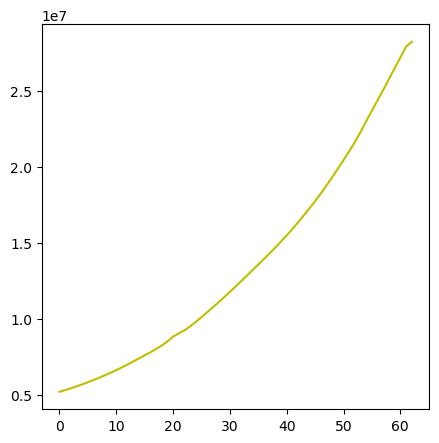

In [121]:
Data['Population CMR '].plot(figsize=(5,5),c='y')
plt.show()

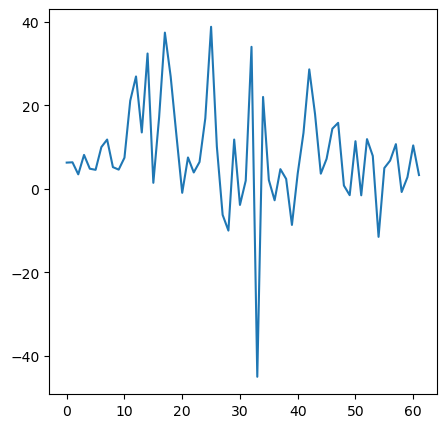

In [122]:
Data['variationPIB %'].plot(figsize=(5,5))
plt.show()

## Visualization of strong and weak relationships among various parameters.

In [123]:
correlations=df[['Année','Population CMR ','Pib par habitant',"Taux d'inflation",'PIBCMR','Variation  pop%']].corr()

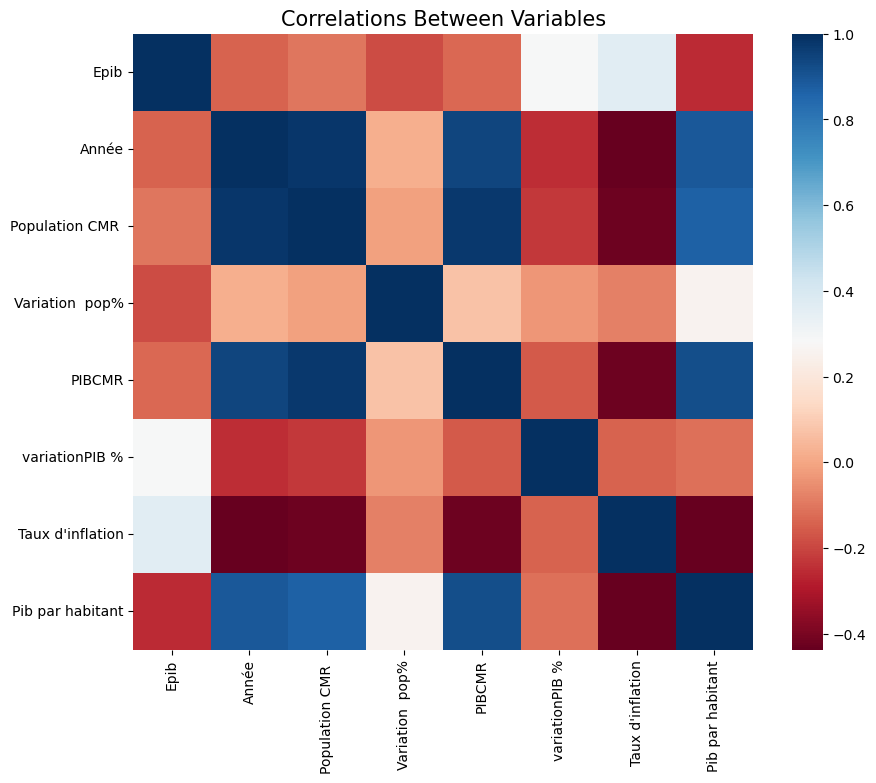

In [124]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

<Axes: >

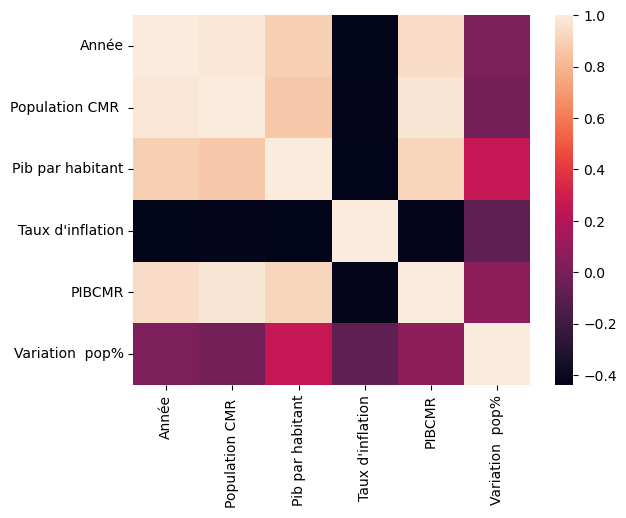

In [125]:
sns.heatmap(correlations)

## Importing the scikit-learn libraries for data manipulation

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Splitting the parameters and the target Target1 = GDP.

In [127]:
X = df.drop('PIBCMR',axis=1)
y = df['PIBCMR']

## Splitting the training data and the test data

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Train set:',X_train.shape)
print('Train set:',X_test.shape)

Train set: (43, 7)
Train set: (11, 7)


## Comparison of Training and Test Sets Using Scatter Plots

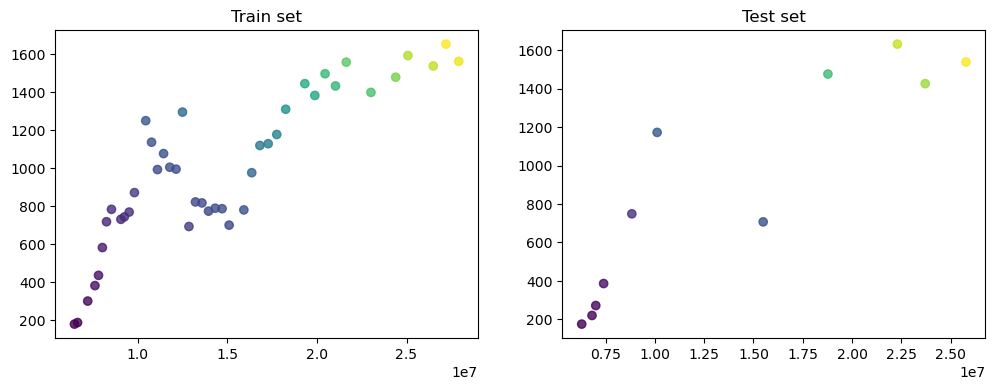

In [129]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X_train['Population CMR '], X_train['Pib par habitant'], c=y_train, alpha=0.8)
plt.title('Train set')

plt.subplot(122)
plt.scatter(X_test['Population CMR '], X_test['Pib par habitant'], c=y_test, alpha=0.8)
plt.title('Test set')

plt.show()


# Model training.

In [130]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train score:',model.score(X_train,y_train))
print('Test score:',model.score(X_test,y_test))

Train score: 0.9982004136735201
Test score: 0.9965970136781649


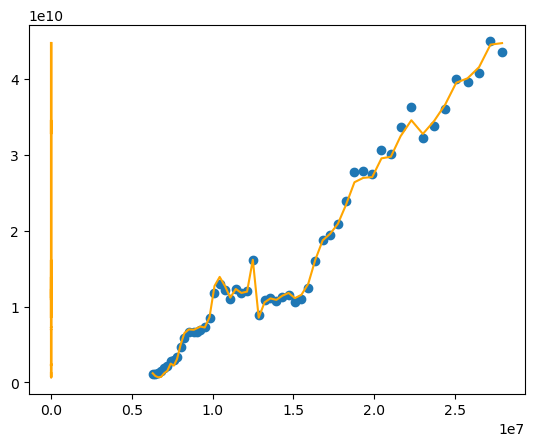

In [131]:
predictions = model.predict(X)

plt.scatter(X[['Population CMR ']],y)
plt.plot(X, predictions, c='orange')

## Error evaluation.

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
# Calculer le score en utilisant la validation croisée avec la métrique MSE
mse_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()

# Les scores MSE sont négatifs, donc on prend l'opposé
mse_scores = -mse_scores

# Afficher les scores MSE
print("Mean Squared Error (MSE) scores:", mse_scores)


Mean Squared Error (MSE) scores: 4.9228575936429485e+17


## Exploration of other models.

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
model_rf =  RandomForestRegressor()
model_rf.fit(X_train, y_train)
print('Train score_rf:',model_rf.score(X_train,y_train))
print('Test score_rf:',model_rf.score(X_test,y_test))


# Calculer le score en utilisant la validation croisée avec la métrique MSE
mse_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()

# Les scores MSE sont négatifs, donc on prend l'opposé
mse_scores_rf = -mse_scores_rf

# Afficher les scores MSE
print("Mean Squared Error (MSE) scores_rf:", mse_scores_rf)


Train score_rf: 0.9983171793266256
Test score_rf: 0.9970128363098818
Mean Squared Error (MSE) scores_rf: 3.1775432218061373e+18


In [136]:
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge, Ridge, Lasso

In [137]:
model_svm = SVR()
model_svm.fit(X_train, y_train)
print('Train score_svm:',model_svm.score(X_train,y_train))
print('Test score_svm:',model_svm.score(X_test,y_test))


# Calculer le score en utilisant la validation croisée avec la métrique MSE
mse_scores_svm = cross_val_score(model_svm, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()

# Les scores MSE sont négatifs, donc on prend l'opposé
mse_scores_svm = -mse_scores_svm

# Afficher les scores MSE
print("Mean Squared Error (MSE) scores_svm:", mse_scores_svm)


Train score_svm: -0.14655776587519131
Test score_svm: -0.06644922156443744
Mean Squared Error (MSE) scores_svm: 1.724845068785908e+20


In [138]:
model_br =  BayesianRidge()
model_br.fit(X_train, y_train)
print('Train score_br:',model_br.score(X_train,y_train))
print('Test score_br:',model_br.score(X_test,y_test))


# Calculer le score en utilisant la validation croisée avec la métrique MSE
mse_scores_br = cross_val_score(model_br, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()

# Les scores MSE sont négatifs, donc on prend l'opposé
mse_scores_br = -mse_scores_br

# Afficher les scores MSE
print("Mean Squared Error (MSE) scores_br:", mse_scores_br)


Train score_br: 0.9465557519555718
Test score_br: 0.9540687710846043
Mean Squared Error (MSE) scores_br: 8.368260024692477e+18


In [139]:
model_re = Ridge()
model_re.fit(X_train, y_train)
print('Train score_re:',model_re.score(X_train,y_train))
print('Test score_re:',model_re.score(X_test,y_test))


# Calculer le score en utilisant la validation croisée avec la métrique MSE
mse_scores_re = cross_val_score(model_re, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()

# Les scores MSE sont négatifs, donc on prend l'opposé
mse_scores_re = -mse_scores_re

# Afficher les scores MSE
print("Mean Squared Error (MSE) scores_re:", mse_scores_re)



#predictions_re = model_re.predict(X)

#plt.scatter(X[['Population CMR ']],y)
#plt.plot(X, predictions_re, c='r')

Train score_re: 0.998179579091354
Test score_re: 0.9965118498129087
Mean Squared Error (MSE) scores_re: 4.955833973453791e+17


In [140]:
model_lo = Lasso()
model_lo.fit(X_train, y_train)
print('Train score_lo:',model_lo.score(X_train,y_train))
print('Test score_lo:',model_lo.score(X_test,y_test))


# Calculer le score en utilisant la validation croisée avec la métrique MSE
mse_scores_lo = cross_val_score(model_lo, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()

# Les scores MSE sont négatifs, donc on prend l'opposé
mse_scores_lo = -mse_scores_lo

# Afficher les scores MSE
print("Mean Squared Error (MSE) scores_lo:", mse_scores_lo)


Train score_lo: 0.9982004136735204
Test score_lo: 0.9965970136745652
Mean Squared Error (MSE) scores_lo: 4.922857592875066e+17


C:\Users\Micro_W10\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.335e+18, tolerance: 6.433e+17
  model = cd_fast.enet_coordinate_descent(
C:\Users\Micro_W10\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.314e+18, tolerance: 3.839e+17
  model = cd_fast.enet_coordinate_descent(
C:\Users\Micro_W10\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.360e+

### Testing predictions on new data points.

In [ ]:
Z={'Epib':[3.9],'Année':[2023],'Population CMR ':[28234270],'Variation  pop%':[2.63],'variationPIB %':[
    3.00],"Taux d'inflation":[7.4],'Pib par habitant':[1563.48894034459]}

In [ ]:
Z

In [ ]:
df23 = pd.DataFrame(Z)

In [ ]:
tchoutzine_predict = model.predict(df23)

## Results

In [ ]:
tchoutzine_predict

## Generalization using a function for foreign and future data.

In [ ]:


import pandas as pd

def predict_pib(data):
    # Créer un DataFrame à partir du dictionnaire
    df = pd.DataFrame(data)
    
    # Prédire Tchoutzine en utilisant le modèle
    pib_predict = model.predict(df)
    
    return pib_predict

def demander_valeurs_utilisateur():
    Z = {}
    Z['Epib'] = [float(input("Entrez la valeur de 'Epib': "))]
    Z['Année'] = [int(input("Entrez la valeur de 'Année': "))]
    Z['Population CMR '] = [int(input("Entrez la valeur de 'Population CMR ': "))]
    Z['Variation  pop%'] = [float(input("Entrez la valeur de 'Variation  pop%': "))]
    Z['variationPIB %'] = [float(input("Entrez la valeur de 'variationPIB %': "))]
    Z["Taux d'inflation"] = [float(input("Entrez la valeur de 'Taux d'inflation': "))]
    Z['Pib par habitant'] = [float(input("Entrez la valeur de 'Pib par habitant': "))]
    return Z

# Utilisation de la fonction avec les données fournies par l'utilisateur
donnees_utilisateur = demander_valeurs_utilisateur()
pib_predict = predict_pib(donnees_utilisateur)
print("La prédiction de PIB pour cette année est :", pib_predict)


# New target and new prediction Target2 = GDP per capita.

In [141]:
df.head(5)

,Epib,Année,Population CMR,Variation pop%,PIBCMR,variationPIB %,Taux d'inflation,Pib par habitant
8,2.247517,1969,6286232,2.60,1.100551e+09,5.20,-1.101591,175.073317
9,0.431125,1970,6452787,2.65,1.151217e+09,4.60,5.858086,178.406167
10,0.754074,1971,6627350,2.71,1.236941e+09,7.45,4.014030,186.641930
11,-0.072150,1972,6809468,2.75,1.498252e+09,21.10,8.092919,220.024808
12,2.507232,1973,6998688,2.78,1.901393e+09,26.90,10.384749,271.678543


## GDP per Capita Evolution Curve

[]

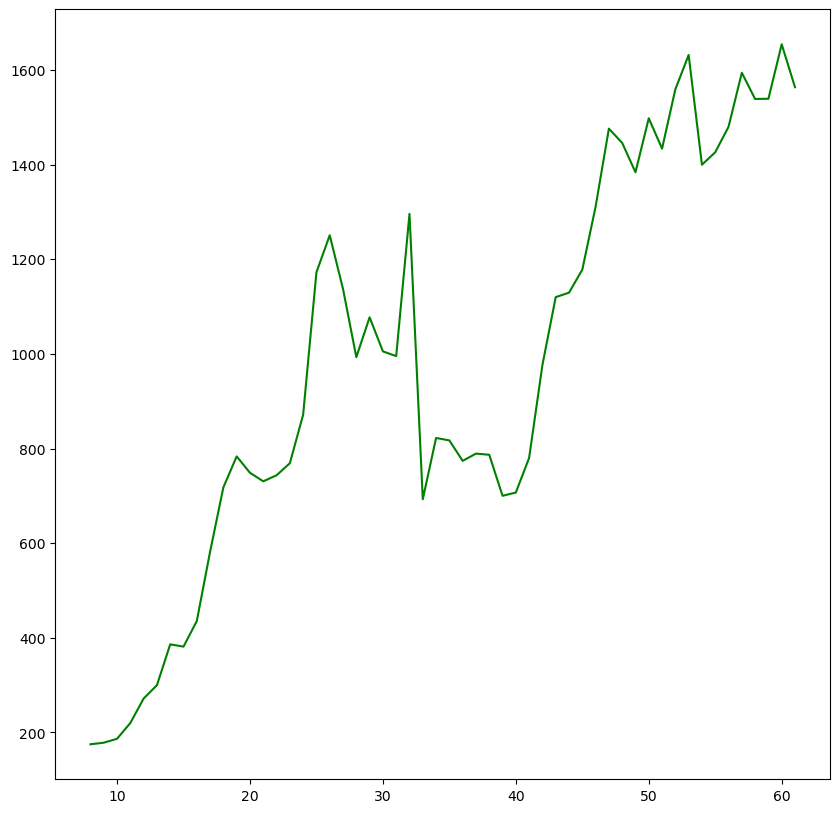

In [142]:
df["Pib par habitant"].plot(figsize=(10,10) , c='g')

plt.plot()

In [143]:
df.head(5)

,Epib,Année,Population CMR,Variation pop%,PIBCMR,variationPIB %,Taux d'inflation,Pib par habitant
8,2.247517,1969,6286232,2.60,1.100551e+09,5.20,-1.101591,175.073317
9,0.431125,1970,6452787,2.65,1.151217e+09,4.60,5.858086,178.406167
10,0.754074,1971,6627350,2.71,1.236941e+09,7.45,4.014030,186.641930
11,-0.072150,1972,6809468,2.75,1.498252e+09,21.10,8.092919,220.024808
12,2.507232,1973,6998688,2.78,1.901393e+09,26.90,10.384749,271.678543


In [144]:
Xh = df.drop("Pib par habitant",axis=1)
yh = df["Pib par habitant"]

In [145]:
Xh.head(3)

,Epib,Année,Population CMR,Variation pop%,PIBCMR,variationPIB %,Taux d'inflation
8,2.247517,1969,6286232,2.60,1.100551e+09,5.20,-1.101591
9,0.431125,1970,6452787,2.65,1.151217e+09,4.60,5.858086
10,0.754074,1971,6627350,2.71,1.236941e+09,7.45,4.014030


In [146]:
yh.head(3)

8     175.073317
9     178.406167
10    186.641930
Name: Pib par habitant, dtype: float64

In [147]:
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.2)

print('Train set:',Xh_train.shape)
print('Train set:',Xh_test.shape)

Train set: (43, 7)
Train set: (11, 7)


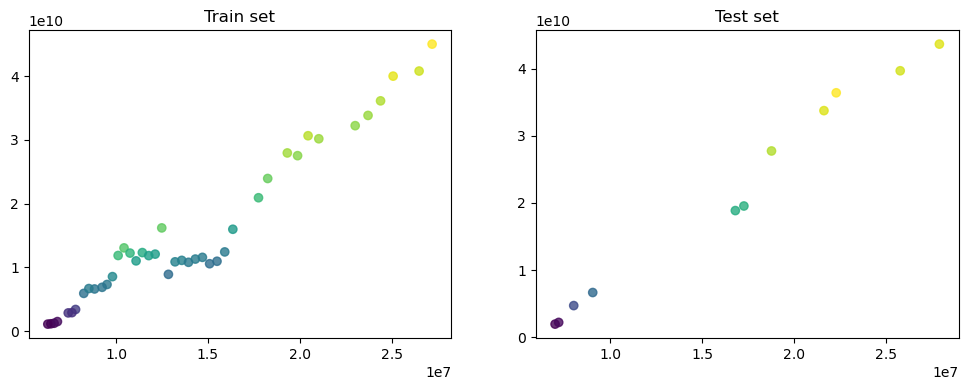

In [148]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(Xh_train['Population CMR '], Xh_train['PIBCMR'], c=yh_train, alpha=0.8)
plt.title('Train set')

plt.subplot(122)
plt.scatter(Xh_test['Population CMR '], Xh_test['PIBCMR'], c=yh_test, alpha=0.8)
plt.title('Test set')

plt.show()


In [149]:
model_h = LinearRegression()
model_h.fit(Xh_train, yh_train)
print('Train score:',model_h.score(Xh_train,yh_train))
print('Test score:',model_h.score(Xh_test,yh_test))


# Calculer le score en utilisant la validation croisée avec la métrique MSE
mse_scores_h = cross_val_score(model_h, Xh_train, yh_train, cv=3, scoring='neg_mean_squared_error').mean()

# Les scores MSE sont négatifs, donc on prend l'opposé
mse_scores_h = -mse_scores

# Afficher les scores MSE
print("Mean Squared Error (MSE) scores:", mse_scores_h)


Train score: 0.9933727310343601
Test score: 0.9818283611164617
Mean Squared Error (MSE) scores: -4.9228575936429485e+17


In [150]:
### model_lo = Lasso()
model_lo.fit(Xh_train, yh_train)
print('Train score_lo:',model_lo.score(Xh_train,yh_train))
print('Test score_lo:',model_lo.score(Xh_test,yh_test))


# Calculer le score en utilisant la validation croisée avec la métrique MSE
mse_scores_lo_h = cross_val_score(model_lo, Xh_train, yh_train, cv=3, scoring='neg_mean_squared_error').mean()

# Les scores MSE sont négatifs, donc on prend l'opposé
mse_scores_lo_h = -mse_scores_lo_h

# Afficher les scores MSE
print("Mean Squared Error (MSE) scores_lo:", mse_scores_lo_h)


Train score_lo: 0.9932294117839688
Test score_lo: 0.982027439486743
Mean Squared Error (MSE) scores_lo: 1862.101364582141


C:\Users\Micro_W10\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.017e+04, tolerance: 7.191e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Micro_W10\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.139e+04, tolerance: 4.960e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Micro_W10\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e+

### Testing predictions on new data points. 2023 Data

In [151]:
V={'Epib':[3.9],'Année':[2023],'Population CMR ':[28234270],'Variation  pop%':[2.63],'PIBCMR':[49089000000],'variationPIB %':[3.00],"Taux d'inflation":[7.4]} #'Pib par habitant':[1563.48894034459],}

In [152]:
V

{'Epib': [3.9],
 'Année': [2023],
 'Population CMR ': [28234270],
 'Variation  pop%': [2.63],
 'PIBCMR': [49089000000],
 'variationPIB %': [3.0],
 "Taux d'inflation": [7.4]}

In [153]:
df24 = pd.DataFrame(V)

In [154]:
pib_hbt_predict = abs(model_lo.predict(df24))

In [155]:
pib_hbt_predict #	1441.79

array([1837.76229194])

## Generalization using a function for foreign and future data.

In [157]:
def predict_pib_hbt(data):
    # Créer un DataFrame à partir du dictionnaire
    df = pd.DataFrame(data)
    
    # Prédire le PIB par habitant en utilisant le modèle
    pib_hbt_predict = abs(model_lo.predict(df))
    
    return pib_hbt_predict

def demander_valeurs_utilisateur():
    V = {}
    V['Epib'] = [float(input("Entrez la valeur de 'Epib': "))]
    V['Année'] = [int(input("Entrez la valeur de 'Année': "))]
    V['Population CMR '] = [int(input("Entrez la valeur de 'Population CMR': "))]
    V['Variation  pop%'] = [float(input("Entrez la valeur de 'Variation pop%': "))]
    V['PIBCMR'] = [float(input("Entrez la valeur de 'PIBCMR': "))]
    V['variationPIB %'] = [float(input("Entrez la valeur de 'variationPIB %': "))]
    V["Taux d'inflation"] = [float(input("Entrez la valeur de 'Taux d'inflation': "))]
    return V

# Utilisation de la fonction avec les données fournies par l'utilisateur
donnees_utilisateur = demander_valeurs_utilisateur()
pib_hbt_predict = predict_pib_hbt(donnees_utilisateur)
print("La prédiction du PIB par habitant est :", pib_hbt_predict)


Entrez la valeur de 'Epib': 4
Entrez la valeur de 'Année': 2023
Entrez la valeur de 'Population CMR': 28234270
Entrez la valeur de 'Variation pop%': 2.51
Entrez la valeur de 'PIBCMR': 43690000000
Entrez la valeur de 'variationPIB %': 4.2
Entrez la valeur de 'Taux d'inflation': 7.2
La prédiction du PIB par habitant est : [1451.11175391]


# Author 1: Balbino Tchoutzine; tchouzine@gmail.com
# Author 2: Jacquy Ngonga; junsts719@gmail.com

# *END*